In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import scipy as sp
import pickle
import h5py
from sklearn.metrics import mean_squared_error

In [3]:
#sys.path.append("../..")
sys.path.append("..")

import WatChMaL.analysis.event_utils as ev
from WatChMaL.analysis.multi_plot_utils import multi_disp_learn_hist, multi_compute_roc, multi_plot_roc
from WatChMaL.analysis.comparison_utils import multi_get_masked_data, multi_collapse_test_output
from WatChMaL.analysis.performance_analysis_utils import remove_indices
from WatChMaL.analysis.performance_analysis_plot_utils import plot_fitqun_binned_performance, plot_momentum_binned_performance
from WatChMaL.analysis.performance_analysis_plot_utils import plot_true_momentum_binned_performance, plot_to_wall_binned_performance, plot_energy_binned_performance, plot_zenith_binned_performance, plot_azimuth_binned_performance
from WatChMaL.analysis.performance_analysis_plot_utils import plot_to_wall_binned_in_energy, plot_zenith_binned_in_azimuth, plot_azimuth_binned_in_zenith

In [4]:
############# define plotting params #############
c = plt.rcParams['axes.prop_cycle'].by_key()['color']
label_dict = {"$\gamma$":0, "$e$":1, "$\mu$":2, "$\pi^0$": 3}
inverse_label_dict = {0:"$\gamma$", 1:"$e$", 2:"$\mu$", 3: "$\pi^0$"}
dim_dict = {"x":0, "y":1, "z":2}

# Preparing data

## Get true particle data from h5 file

In [5]:
# get indices of test events
idxs_path_s = '/project/rpp-blairt2k/machine_learning/data/HKHybrid/numpy/e-_w_mPMT_no_fv_cut_idxs.npz'
# idxs_path_d = '/project/rpp-blairt2k/machine_learning/data/HKHybrid/numpy/HKHybrid_e-gamma_E0to1000MeV_unif-pos-R3240-y3287cm_4pi-dir_idxs_w_mPMT.npz'
idxs_s = np.load(idxs_path_s, allow_pickle=True)
# idxs_d = np.load(idxs_path_d, allow_pickle=True)
test_idxs_s = idxs_s['test_idxs']
# test_idxs_d = idxs_d['test_idxs']

In [8]:
# open h5 file and get data for test events
data_path = "/project/rpp-blairt2k/machine_learning/data/HKHybrid/numpy/HKHybrid_e-gamma_E0to1000MeV_unif-pos-R3240-y3287cm_4pi-dir_6Mevts_w_mPMT.hdf5"
# data_path = "/project/rpp-blairt2k/machine_learning/data/HKHybrid/numpy/e-mu-pi0.hdf5"
h5_file = h5py.File(data_path, "r")
h5_labels_s     = np.array(h5_file['labels'])[test_idxs_s].squeeze()
h5_root_files_s = np.array(h5_file['root_files'])[test_idxs_s].squeeze()
# h5_labels_d     = np.array(h5_file['labels'])[test_idxs_d].squeeze()
# h5_root_files_d = np.array(h5_file['root_files'])[test_idxs_d].squeeze()
h5_angles     = np.array(h5_file['angles'])[test_idxs_s].squeeze()
h5_energies   = np.array(h5_file['energies'])[test_idxs_s].squeeze()
h5_positions  = np.array(h5_file['positions'])[test_idxs_s].squeeze()
h5_labels     = np.array(h5_file['labels'])[test_idxs_s].squeeze()
h5_root_files = np.array(h5_file['root_files'])[test_idxs_s].squeeze()
h5_event_ids  = np.array(h5_file['event_ids'])[test_idxs_s].squeeze()
h5_vetos      = np.array(h5_file['veto'])[test_idxs_s].squeeze()

In [12]:
test_idxs_s[-1]

1199999

In [31]:
regression_target[0][:,0][:10].astype(float)

array([-327.94009399,   96.16208649, 1738.04248047,  903.37072754,
       1243.63574219, 1591.55322266,  972.30963135, -998.67810059,
       1964.54602051, -731.10626221])

## Pointnet outputs

Position Recon

In [6]:
# Loading pointnet results
pointnet_reg_loc = [#'/project/rpp-blairt2k/jgao/WatChMaL/outputs/2023-01-11/11-04-33/outputs'] # (no flag) e position recon 
#                     '/project/rpp-blairt2k/jgao/WatChMaL/outputs/2023-01-25/09-42-31/outputs'] # (no flag) mu position recon
#                     '/project/rpp-blairt2k/jgao/WatChMaL/outputs/2023-01-25/11-45-08/outputs'] # (no flag) pi0 position recon
#                     '/project/rpp-blairt2k/jgao/WatChMaL/outputs/2023-01-25/15-15-36/outputs'] # (no flag) g position recon
                    '/project/rpp-blairt2k/jgao/WatChMaL/outputs/2023-02-07/13-59-52/outputs'] # e position recon
#                     '/project/rpp-blairt2k/jgao/WatChMaL/outputs/2023-02-02/11-34-00/outputs'] # mu position recon
#                     '/project/rpp-blairt2k/jgao/WatChMaL/outputs/2023-02-06/07-12-37/outputs'] # pi0 position recon
#                     '/project/rpp-blairt2k/jgao/WatChMaL/outputs/2023-02-08/12-03-10/outputs'] # g position recon
    
    

regression_target             = [np.load(loc + "/targets.npy") for loc in pointnet_reg_loc]
regression_prediction         = [np.load(loc + "/predictions.npy") for loc in pointnet_reg_loc]
regression_indices            = [np.load(loc + "/indices.npy").astype(int) for loc in pointnet_reg_loc]

In [11]:
dim = "z"
particle = 2

In [13]:
regression_indices

[array([      0,       4,       8, ..., 1202991, 1202995, 1202999])]

In [55]:
# index = np.asarray(regression_indices, dtype=int)
print(a)
print(index[0][a])
print(regression_target[0][2])
print(h5_positions[2])

[   2080   18599   20431   22879   24060   33036   33753   44810   62250
   76896   78327   88193   91658  101440  108409  116682  116760  119452
  130001  131898  132301  133246  135160  140447  144000  159410  166358
  178638  190127  201947  204626  207192  220488  221314  227694  229048
  238447  249284  256735  257727  281079  283334  287552  290866  291876
  308506  308977  315389  326556  333233  333826  340183  346963  349467
  359424  362613  371522  374601  374888  376597  384846  403327  403331
  411185  415295  416328  420877  423573  426617  429871  432954  433534
  446712  447675  468583  468827  498457  499053  516136  523362  523507
  525102  527340  528316  542501  547309  550378  554185  562804  567673
  579583  579789  586891  603324  618666  628244  632497  634715  636705
  649514  653155  655365  656859  663787  664995  669347  676761  682485
  690551  698195  728803  735066  738570  741220  754679  758653  760151
  766455  773025  789925  804727  823742  824173  8

In [62]:
print(np.where(regression_indices==1))

(array([], dtype=int64),)


### Energy Recon

In [5]:
pointnet_reg_loc = ['/project/rpp-blairt2k/jgao/WatChMaL/outputs/2023-03-01/08-48-54/outputs'] # e energy recon
    

regression_target             = [np.load(loc + "/targets.npy") for loc in pointnet_reg_loc]
regression_prediction         = [np.load(loc + "/predictions.npy") for loc in pointnet_reg_loc]

## Plot Recon vs True Values

### Energy

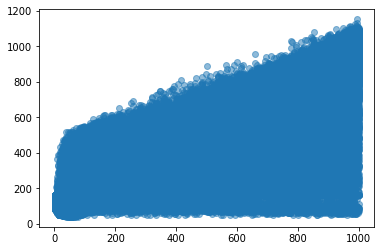

In [6]:
residual = regression_target[0] - regression_prediction[0]
plt.plot(regression_target[0], regression_prediction[0], "o", alpha=0.5)


Text(0, 0.5, 'No. of events')

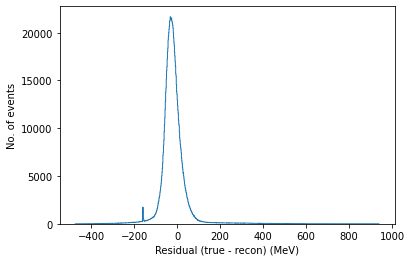

In [7]:
plt.hist(residual, histtype='step', bins=1000)
plt.xlabel("Residual (true - recon) (MeV)")
plt.ylabel("No. of events")

In [9]:
energy_cut = np.where(regression_target[0] > 100.)[0]

In [10]:
RMS_E = mean_squared_error(regression_target[0][energy_cut], regression_prediction[0][energy_cut], squared=False)
print(RMS_E)

71.4592568708758


### Position

In [33]:
a = np.where((regression_prediction[0][:,dim_dict[dim]]<-127) &
             (regression_prediction[0][:,dim_dict[dim]]>-128))[0]
# np.savez("weird_event_no_mu.npz", a = a)
print(a)

[   2080   18599   20431   22879   24060   33036   33753   44810   62250
   76896   78327   88193   91658  101440  108409  116682  116760  119452
  130001  131898  132301  133246  135160  140447  144000  159410  166358
  178638  190127  201947  204626  207192  220488  221314  227694  229048
  238447  249284  256735  257727  281079  283334  287552  290866  291876
  308506  308977  315389  326556  333233  333826  340183  346963  349467
  359424  362613  371522  374601  374888  376597  384846  403327  403331
  411185  415295  416328  420877  423573  426617  429871  432954  433534
  446712  447675  468583  468827  498457  499053  516136  523362  523507
  525102  527340  528316  542501  547309  550378  554185  562804  567673
  579583  579789  586891  603324  618666  628244  632497  634715  636705
  649514  653155  655365  656859  663787  664995  669347  676761  682485
  690551  698195  728803  735066  738570  741220  754679  758653  760151
  766455  773025  789925  804727  823742  824173  8

In [77]:
new_target = np.delete(regression_target[0], a, axis=0)

In [71]:
len(new_target)

1172735

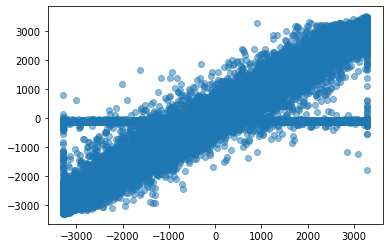

In [84]:
# Finding out the event with strange recon pos value
plt.plot(regression_target[0][:,dim_dict[dim]], regression_prediction[0][:,dim_dict[dim]], "o", alpha=0.5)
# plt.ylim([-130, -100])

In [23]:
print(regression_prediction[0][:,0])
print(regression_prediction[0][:,0][1199539])

[ -234.96348572 -2545.81640625 -1708.17687988 ...  1469.96350098
  1431.79162598 -2501.22070312]
-1547.3048095703125


In [7]:
# Calculate residual
residual = regression_target[0][:,dim_dict[dim]] - regression_prediction[0][:,dim_dict[dim]]


KeyboardInterrupt



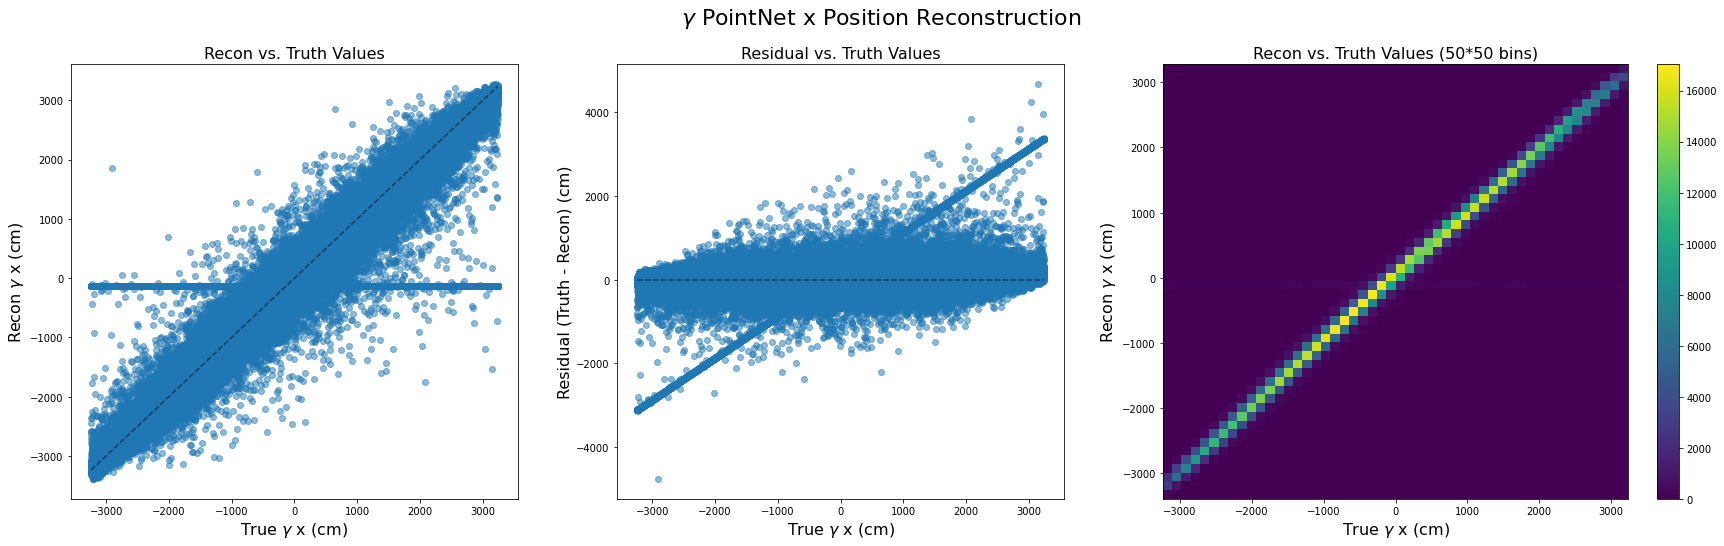

In [8]:
min_val = min(regression_target[0][:,dim_dict[dim]])
max_val = max(regression_target[0][:,dim_dict[dim]])
ref_x = [min_val, max_val]
ref_y = [min_val, max_val]

fig, axs = plt.subplots(1, 3, figsize=(30, 8), gridspec_kw={'width_ratios': [1, 1, 1.3]})
axs[0].plot(regression_target[0][:,dim_dict[dim]], regression_prediction[0][:,dim_dict[dim]], "o", alpha=0.5)
axs[0].plot(ref_x, ref_y, '--', color='black', alpha=0.5)
axs[1].plot(regression_target[0][:,dim_dict[dim]], residual, "o", alpha=0.5)
axs[1].plot(ref_x, [0, 0], '--', color='black', alpha=0.5)
h = axs[2].hist2d(regression_target[0][:,dim_dict[dim]], regression_prediction[0][:,dim_dict[dim]], bins=(50,50))
plt.colorbar(h[3])

axs[0].set_title("Recon vs. Truth Values", fontsize=16)
axs[0].set_xlabel("True $\gamma$ %c (cm)" %dim, fontsize=16)
axs[0].set_ylabel("Recon $\gamma$ %c (cm)" %dim, fontsize=16)
axs[1].set_title("Residual vs. Truth Values", fontsize=16)
axs[1].set_xlabel("True $\gamma$ %c (cm)" %dim, fontsize=16)
axs[1].set_ylabel("Residual (Truth - Recon) (cm)", fontsize=16)
axs[2].set_title("Recon vs. Truth Values (50*50 bins)", fontsize=16)
axs[2].set_xlabel("True $\gamma$ %c (cm)" %dim, fontsize=16)
axs[2].set_ylabel("Recon $\gamma$ %c (cm)" %dim, fontsize=16)
fig.suptitle("$\gamma$ PointNet %c Position Reconstruction" %dim, fontsize=22)
# plt.savefig("pos_recon_analysis_plots/after_mPMT_fix/g_%c_position_recon.png" %dim)
# axs[1].set_ylim([-50, 0])

## RMS Errors

In [82]:
# RMS error per dimension
RMS_dim = mean_squared_error(new_target[:,dim_dict[dim]], new_prediction[:,dim_dict[dim]], squared=False)
print(RMS_dim)

171.63454399804817


In [149]:
# Overall 3D RMS error
# x_err = (regression_target[0][:,0][gammas] - regression_prediction[0][:,0][gammas])**2
# y_err = (regression_target[0][:,1][gammas] - regression_prediction[0][:,1][gammas])**2
# z_err = (regression_target[0][:,2][gammas] - regression_prediction[0][:,2][gammas])**2
x_err = (regression_target[0][:,0] - regression_prediction[0][:,0])**2
y_err = (regression_target[0][:,1] - regression_prediction[0][:,1])**2
z_err = (regression_target[0][:,2] - regression_prediction[0][:,2])**2
error_3d = np.sqrt(x_err + y_err + z_err)

105.23204351749716


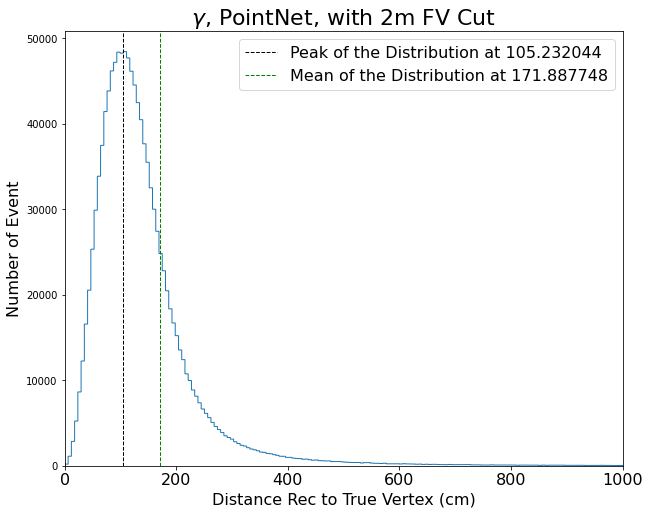

In [150]:
fig = plt.figure(figsize=(10,8))
bin_val, bin_edges, _ = plt.hist(error_3d, histtype='step', bins=1000)  # normalise use density=True
hist_peak = np.where(bin_val == max(bin_val))[0][0]
print(bin_edges[hist_peak])
plt.axvline(bin_edges[hist_peak], color='k', linestyle='dashed', linewidth=1,
            label='Peak of the Distribution at %f' %bin_edges[hist_peak])
plt.axvline(dist_mean, color='g', linestyle='dashed', linewidth=1,
            label='Mean of the Distribution at %f' %dist_mean)
plt.xlim([0,1000])
plt.title('$\gamma$, PointNet, with 2m FV Cut', fontsize=22)
plt.xlabel('Distance Rec to True Vertex (cm)', fontsize=16)
plt.ylabel('Number of Event', fontsize=16)
plt.rc('xtick', labelsize=16)
plt.legend(loc='upper right', fontsize=16)

In [10]:
print(regression_target[0][412760], regression_prediction[0][412760])

[ 8.49723816e-03 -2.89339038e+03  2.95150261e+01] [ -298.77062988 -3032.75854492   143.64529419]


# Producing cuts

In [70]:
energy_cut = np.where((h5_energies > 490) & (h5_energies < 510))[0]

In [145]:
# need to overwrite the tank_half_height and tank_radius parameters that towall and dwall funcs takes in
# The length unit is mm and the the lengths are the dimentions of the ID, so HK ID tank is 32.4m (?) in radius
# and 65.8 m (?) in height. Note the half height is 32.9 m.
towall = ev.towall(h5_positions, h5_angles, tank_half_height=3287, tank_radius=3240, tank_axis=2)
dwall = ev.dwall(h5_positions, tank_half_height=3287, tank_radius=3240, tank_axis=2)
momentum = ev.momentum(h5_energies, h5_labels)

In [146]:
towall_cut = towall > 0.63*np.log(momentum) # only for electrons
dwall_cut = dwall > 200.
# reco_cut = (fq_flag_e == 0) & (fq_flag_mu == 0)
od_veto_cut = (h5_vetos == 0)

# select the true electron events that pass the cuts
gammas = (h5_labels==0) & dwall_cut & od_veto_cut
# select the true electron events that pass the cuts
# electrons = (h5_labels==1) & towall_cut & dwall_cut & od_veto_cut
# select the true muon events that pass the cuts
# muons = (h5_labels==2)  & dwall_cut & od_veto_cut
# select the true pi0 events that pass the cuts
# pi0s = (h5_labels==3)   & dwall_cut & od_veto_cut

IndexError: boolean index did not match indexed array along dimension 0; dimension is 872727 but corresponding boolean dimension is 1200000

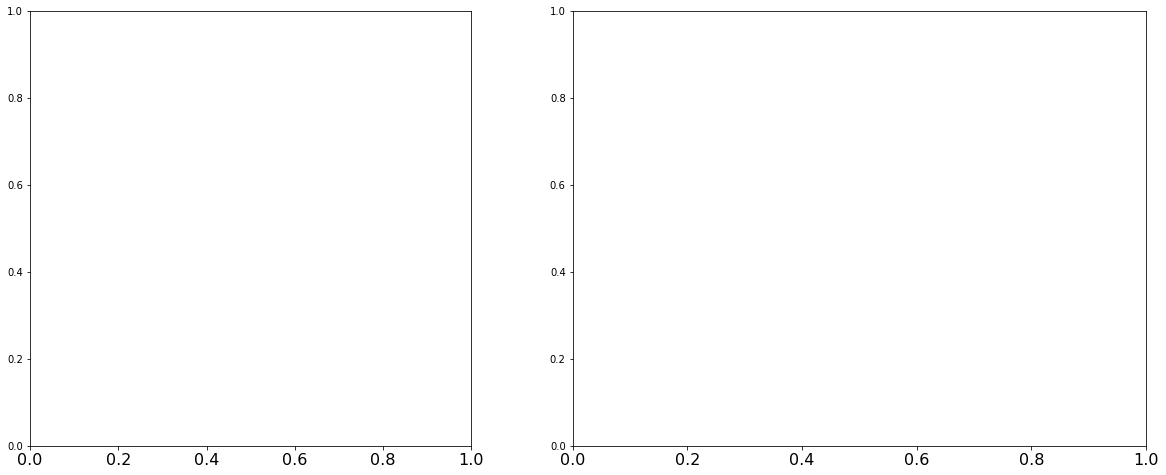

--- Logging error ---
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 461, in dispatch_queue
    await self.process_one()
  File "/opt/conda/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 450, in process_one
    await dispatch(*args)
TypeError: object NoneType can't be used in 'await' expression

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/logging/__init__.py", line 1089, in emit
    self.flush()
  File "/opt/conda/lib/python3.8/logging/__init__.py", line 1069, in flush
    self.stream.flush()
BrokenPipeError: [Errno 32] Broken pipe
Call stack:
  File "/opt/conda/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/conda/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.8/site-packages/ipykernel_laun

In [92]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={'width_ratios': [1, 1.3]})
axs[0].plot(dwall[electrons], error_3d[electrons], 'o', alpha=0.5)
h1 = axs[1].hist2d(dwall, error_3d, bins=(1000,1000))
plt.colorbar(h1[3])

axs[0].set_xlabel('dwall (cm)', fontsize=16)
axs[0].set_ylabel('Distance between recon and true vertex (cm)', fontsize=16)
axs[1].set_xlabel('dwall (cm)', fontsize=16)
axs[1].set_ylabel('Distance between recon and true vertex (cm)', fontsize=16)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 

(array([[ 1., 15., 43., ...,  0.,  0.,  0.],
        [ 7., 16., 29., ...,  0.,  0.,  0.],
        [ 5., 16., 35., ...,  0.,  0.,  0.],
        ...,
        [ 2., 13., 28., ...,  0.,  0.,  0.],
        [ 5., 16., 48., ...,  0.,  0.,  0.],
        [ 2., 12., 47., ...,  0.,  0.,  0.]]),
 array([7.77442694e-01, 2.77742492e+00, 4.77740714e+00, 6.77738937e+00,
        8.77737159e+00, 1.07773538e+01, 1.27773360e+01, 1.47773183e+01,
        1.67773005e+01, 1.87772827e+01, 2.07772649e+01, 2.27772472e+01,
        2.47772294e+01, 2.67772116e+01, 2.87771938e+01, 3.07771761e+01,
        3.27771583e+01, 3.47771405e+01, 3.67771227e+01, 3.87771049e+01,
        4.07770872e+01, 4.27770694e+01, 4.47770516e+01, 4.67770338e+01,
        4.87770161e+01, 5.07769983e+01, 5.27769805e+01, 5.47769627e+01,
        5.67769450e+01, 5.87769272e+01, 6.07769094e+01, 6.27768916e+01,
        6.47768739e+01, 6.67768561e+01, 6.87768383e+01, 7.07768205e+01,
        7.27768028e+01, 7.47767850e+01, 7.67767672e+01, 7.87767494e

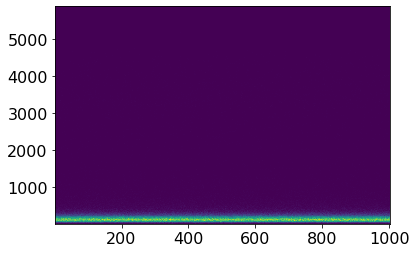

In [51]:
plt.hist2d(h5_energies, error_3d, bins=(500,500))